In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('final adjustment',low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[3,4]}, index_col=['datetime'])

In [3]:
df.drop(columns='Accident_Index',inplace=True)

In [4]:
df.head()

,Number_of_Casualties,Car_Occupants
datetime,,
2016-01-11 02:30:00,1,2
2016-01-11 00:37:00,1,1
2016-01-11 01:25:00,1,1
2016-01-11 07:53:00,1,2
2016-01-11 09:29:00,1,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 155574 entries, 2016-01-11 02:30:00 to 2016-12-25 12:30:00
Data columns (total 2 columns):
Number_of_Casualties    155574 non-null int64
Car_Occupants           155574 non-null int64
dtypes: int64(2)
memory usage: 3.6 MB


In [6]:
#Downsample to Daily data points
df_daily = df.resample('D').mean()
print(df_daily.head(10))

            Number_of_Casualties  Car_Occupants
datetime                                       
2016-01-01              2.197802       4.291209
2016-01-02              1.707246       3.985507
2016-01-03              1.932367       4.461353
2016-01-04              2.084399       5.273657
2016-01-05              2.129683       4.224784
2016-01-06              1.649123       3.388889
2016-01-07              1.720307       3.760536
2016-01-08              1.775510       3.807256
2016-01-09              1.660147       3.699267
2016-01-10              1.883065       4.477823


C:\Users\Precious\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Downsampled Data')

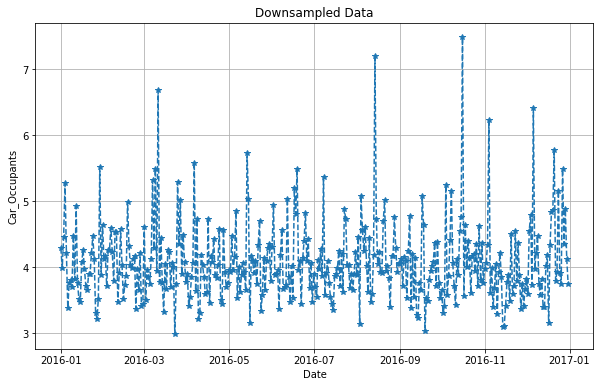

In [7]:
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily['Car_Occupants'], '--',marker='*')
#plt.plot(df_daily, 'red')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Car_Occupants')
plt.title('Downsampled Data')  ## this is just trying out a visualization, more insights from the statistical test

### Carrying out Smoothing

Using the knowledge of **Moving Average** We'll take the first 20 days to get better insights of the pattterns


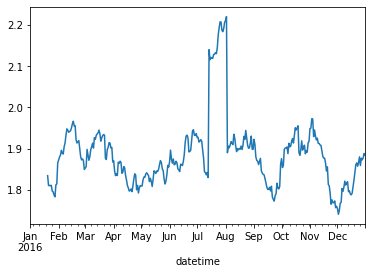

In [9]:
df_daily_mean['Number_of_Casualties'].plot()

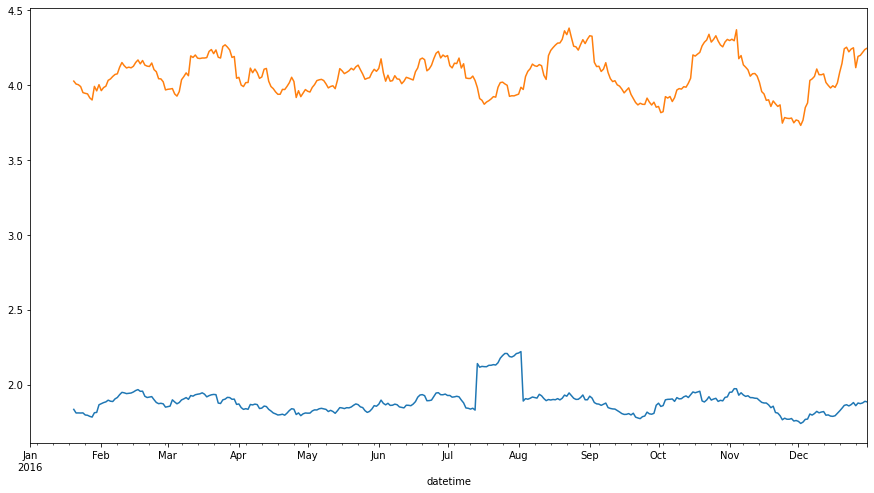

In [8]:

plt.figure(figsize=(15,8)) 

df_daily_mean = df_daily.rolling(window = 20).mean()

df_daily_mean['Number_of_Casualties'].plot()

df_daily_mean['Car_Occupants'].plot()



### Desampling to Months to compare

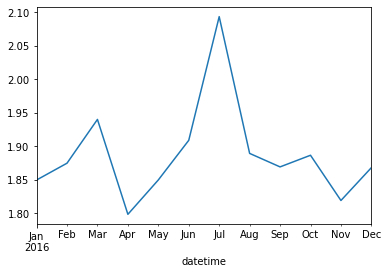

In [10]:
df['Number_of_Casualties'].resample('M').mean().plot()


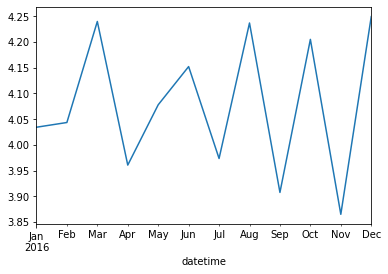

In [11]:
df['Car_Occupants'].resample('M').mean().plot()

### From the results, we can see that the month of JULY had the most No of Casualties

C:\Users\Precious\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Precious\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Precious\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Precious\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDe

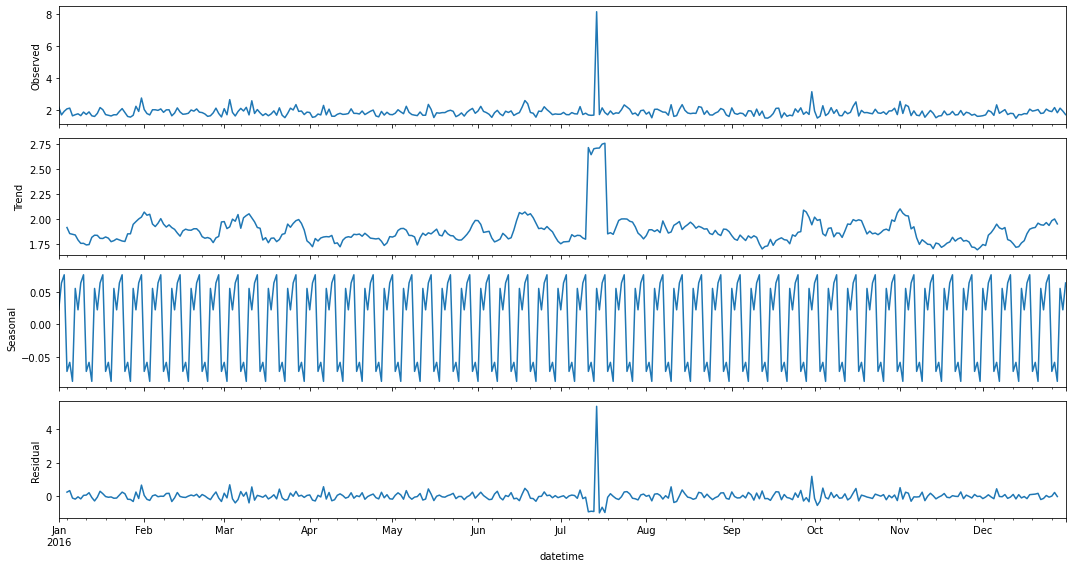

In [12]:

import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df_daily['Number_of_Casualties'], model='additive')
decompose_series.plot()
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_daily['Car_Occupants'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -12.124434117647871
p-value: 1.7942137827615923e-22
No. of lags used: 1
No. of observations used : 364
Critical Values:
   1%: -3.4484434475193777
   5%: -2.869513170510808
   10%: -2.571017574266393


#### This confirms its Stationarity 

## Splitting the Data

In [14]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2016-01-01 to 2016-12-31
Freq: D
Data columns (total 2 columns):
Number_of_Casualties    366 non-null float64
Car_Occupants           366 non-null float64
dtypes: float64(2)
memory usage: 8.6 KB


In [15]:
df_daily.head()


,Number_of_Casualties,Car_Occupants
datetime,,
2016-01-01,2.197802,4.291209
2016-01-02,1.707246,3.985507
2016-01-03,1.932367,4.461353
2016-01-04,2.084399,5.273657
2016-01-05,2.129683,4.224784


In [16]:
df_daily.reset_index(inplace = True)
df_daily.head()

,datetime,Number_of_Casualties,Car_Occupants
0,2016-01-01,2.197802,4.291209
1,2016-01-02,1.707246,3.985507
2,2016-01-03,1.932367,4.461353
3,2016-01-04,2.084399,5.273657
4,2016-01-05,2.129683,4.224784


In [17]:
df_daily = df_daily.rename(columns = {'datetime':'ds','Number_of_Casualties':'y','Car_Occupants':'C_O'})

In [18]:
train_data = df_daily.iloc[:300,:] # take a fraction from the data for training
test_data = df_daily.iloc[300:,:]  # taking a fraction for testing

In [19]:
print(train_data.shape)
print(test_data.shape)

(300, 3)
(66, 3)


In [20]:
train_data.isna().sum()

ds     0
y      0
C_O    0
dtype: int64

In [21]:
train_data.head()

,ds,y,C_O
0,2016-01-01,2.197802,4.291209
1,2016-01-02,1.707246,3.985507
2,2016-01-03,1.932367,4.461353
3,2016-01-04,2.084399,5.273657
4,2016-01-05,2.129683,4.224784


## Making Predictions

In [22]:
from fbprophet import Prophet

In [23]:
#creating the model
model = Prophet()
model.add_regressor('C_O')

In [24]:
#fitting the model to train data
model = model.fit(train_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Precious\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [25]:
#making prediction with test set
prediction = model.predict(test_data)

In [26]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,C_O,C_O_lower,C_O_upper,additive_terms,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-10-27,1.893578,1.403981,2.448581,1.893578,1.893578,-0.081720,-0.081720,-0.081720,0.025162,...,-0.081720,-0.081720,-0.081720,0.106881,0.106881,0.106881,0.0,0.0,0.0,1.918739
1,2016-10-28,1.893395,1.533098,2.522270,1.893395,1.893395,0.124316,0.124316,0.124316,0.135344,...,0.124316,0.124316,0.124316,0.011028,0.011028,0.011028,0.0,0.0,0.0,2.028739
2,2016-10-29,1.893212,1.379383,2.343379,1.893211,1.893214,-0.061270,-0.061270,-0.061270,-0.008475,...,-0.061270,-0.061270,-0.061270,0.052795,0.052795,0.052795,0.0,0.0,0.0,1.884737
3,2016-10-30,1.893029,1.508564,2.464146,1.893022,1.893039,0.066138,0.066138,0.066138,0.078318,...,0.066138,0.066138,0.066138,0.012180,0.012180,0.012180,0.0,0.0,0.0,1.971346
4,2016-10-31,1.892845,1.275992,2.304137,1.892827,1.892866,-0.070249,-0.070249,-0.070249,-0.116497,...,-0.070249,-0.070249,-0.070249,-0.046248,-0.046248,-0.046248,0.0,0.0,0.0,1.776349


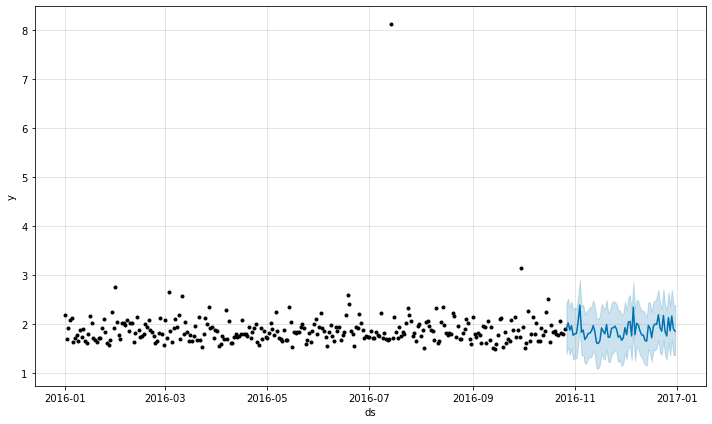

In [27]:
model.plot(prediction)
plt.show()

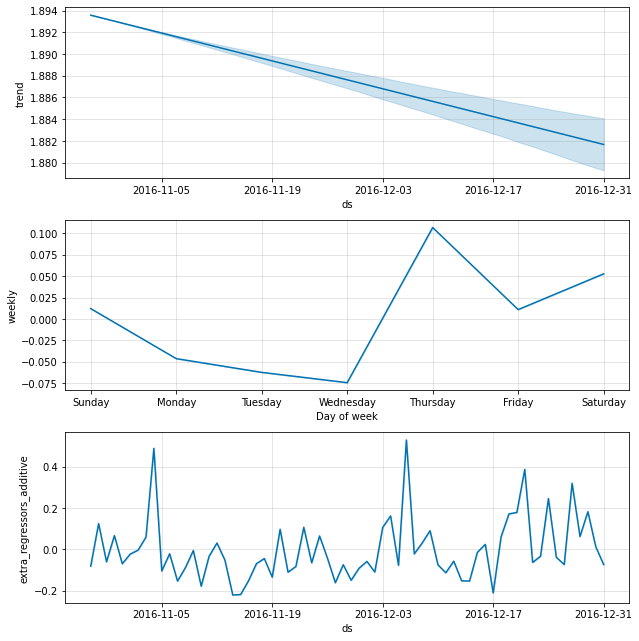

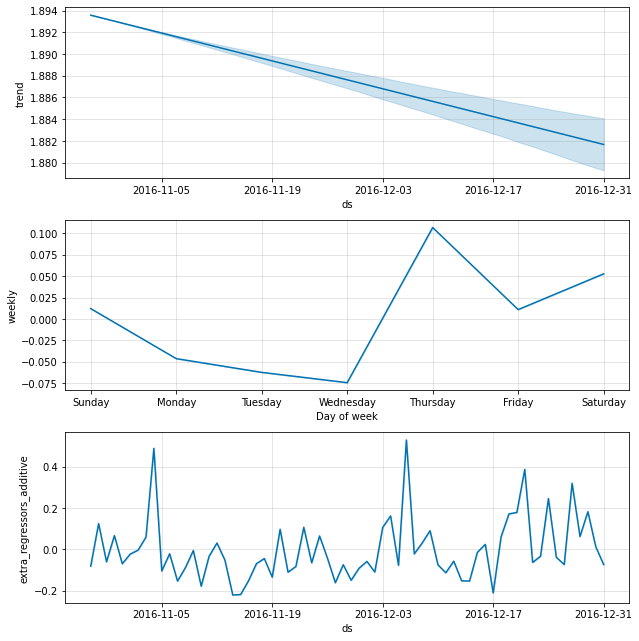

In [28]:
model.plot_components(prediction)